<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 10 - Decision Tree

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


# Cây quyết định cho bài toán dự báo nhân viên nghỉ việc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Yêu cầu bài toán
- Dưa vào dữ liệu train, dự đoán trên tập dữ liệu test xem nhân viên nào sẽ nghỉ việc (trường 'Attrition') 
- Tìm xem đâu là nguyên nhân chính làm cho nhân viên nghỉ việc
- Thử nghiệm một chính sách về nhân sự để giữ chân nhân viên và xem coi nó ảnh hưởng thế nào

## Dữ liệu:
- train.csv với kích thước (1000,27): Dùng để huấn luyện mô hình
- test.csv với kích thước (470,26) : Dùng để dự đoán

## Mục tiêu đạt được sau khi làm bài lab:
- Hiểu được qui trình cơ bản khi làm một bài classification dùng tree-based model
- Biết xử lý category
- Biết xây dựng model và so sánh độ chính xác của model với các model xây dựng bằng thuật toán khác.
- Đọc được kết quả của model và visualize nó
- Biết sử dụng model để làm công cụ dự báo và thử nghiệm giả thuyết

In [ ]:
import pandas as pd
from tensorflow.random import set_seed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# SMOTE : neu du lieu ko can bang no se tao ra du lieu ao
from imblearn.over_sampling import SMOTE


# 1. Chuẩn bị dữ liệu



**DATASET** https://drive.google.com/drive/folders/1AWBCJIohkEcK6-K5o5LhwC4CHWlvg9bR?usp=sharing

In [ ]:
import os

PATH = '/content/drive/My Drive/Colab Notebooks/employee'

df_raw = pd.read_csv(os.path.join(PATH, 'train.csv'), index_col='EmployeeNumber')
df_test = pd.read_csv(os.path.join(PATH, 'test.csv'), index_col='EmployeeNumber')

Xem thử dữ liệu của train data

In [ ]:
df_raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df_raw.describe()
# mean ,min, max

,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,36.992000,9.0670,2.868000,1.0,2.731000,2.769000,6627.086000,2.68900,15.192000,3.154000,2.741000,0.762000,11.410000,2.773000,2.763000,7.134000,4.26600,2.23500,4.168000
std,9.417783,8.1089,1.030358,0.0,1.083426,1.098565,4842.436233,2.53312,3.657118,0.361129,1.087705,0.836694,8.006748,1.311942,0.698082,6.355032,3.63572,3.30283,3.630283
min,18.000000,1.0000,1.000000,1.0,1.000000,1.000000,1009.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000
25%,30.000000,2.0000,2.000000,1.0,2.000000,2.000000,2868.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.00000,2.000000
50%,36.000000,7.0000,3.000000,1.0,3.000000,3.000000,4936.000000,1.50000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.00000,3.000000
75%,43.000000,14.0000,4.000000,1.0,4.000000,4.000000,8723.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.00000,7.000000
max,60.000000,29.0000,5.000000,1.0,4.000000,4.000000,19999.000000,9.00000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.00000,17.000000


**Đếm số lượng giá trị có trong cột EmployeeCount**


In [ ]:
# df_raw.EmployeeCount.value_counts()
df_raw['EmployeeCount'].value_counts()

1    1000
Name: EmployeeCount, dtype: int64

**Drop cột EmployeeCount**

In [ ]:
df_raw.drop(columns=['EmployeeCount'], inplace=True)
df_test.drop(columns=['EmployeeCount'], inplace=True)

In [ ]:
df_raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


Chú thích cho các cột trong data

**Education**
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

Xem các giá trị unique trong cột bất kì

In [ ]:
df_raw.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

Hãy dành 1 chút thời gian kiểm tra toàn bộ các cột trong dataframe để hiểu rõ hơn về dataset

In [ ]:
# TODO
df_raw.Department.value_counts()

Research & Development    663
Sales                     302
Human Resources            35
Name: Department, dtype: int64

Mục tiêu của bài toán là dự đoán xem nhân viên có nghỉ việc hay không. 

Cột mà chúng ta quan tâm là **`Attrition`**, hiện tại đang có value là **{Yes, No}**, ta cần chuyển sang dạng số **{1, 0}**

In [ ]:
def myfunc(n):
  return len(n)

x = map(myfunc, ('apple', 'banana', 'cherry'))

In [ ]:
df_raw.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# TODO
# 1. Google search for usage of pandas map() function
# 2. Apply it on Attrition column for df_raw
# 3. Print out the first 5 columns of df_raw
# Label enconding 
df_raw['Attrition'] = df_raw['Attrition'].map({'Yes':1,'No':0})
df_raw.head()



,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# TODO
# 1. Create y from Attrition column
# 2. Create df_full = df_raw without Attrition column
# 3. Print out the shape of df_full
# 4. Print out the first 5 columns of df_full
y = df_raw['Attrition']
df_train = df_raw.drop(columns=['Attrition'])
print(df_train.shape)
df_train.head()


(1000, 25)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
print(y.shape)

(1000,)


Nhớ rằng, ta cần biến toàn bộ giá trị text trong X thành giá trị số để đưa vào model.

Đầu tiên ta cần check kiểu giá trị của toàn bộ các cột trong Dataframe

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1408
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   BusinessTravel            1000 non-null   object
 2   Department                1000 non-null   object
 3   DistanceFromHome          1000 non-null   int64 
 4   Education                 1000 non-null   int64 
 5   EducationField            1000 non-null   object
 6   EnvironmentSatisfaction   1000 non-null   int64 
 7   Gender                    1000 non-null   object
 8   JobRole                   1000 non-null   object
 9   JobSatisfaction           1000 non-null   int64 
 10  MaritalStatus             1000 non-null   object
 11  MonthlyIncome             1000 non-null   int64 
 12  NumCompaniesWorked        1000 non-null   int64 
 13  OverTime                  1000 non-null   object
 14  PercentSalaryHike       

# 2. Tìm hiểu về dữ liệu


## 2.1 Mối tương quan giữa các biến đầu vào dùng Pearson correlation

In [ ]:
df_train.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.018776,0.182582,0.035695,-0.022625,0.505284,0.312032,-0.044510,-0.053793,0.053249,0.003061,0.690203,-0.005170,-0.029218,0.316925,0.205668,0.215158,0.199571
DistanceFromHome,-0.018776,1.000000,0.021307,-0.022899,0.006346,-0.045598,-0.017844,0.043278,0.030998,0.015248,0.051631,-0.022563,-0.007602,-0.055194,-0.028068,-0.001148,-0.009895,-0.009326
Education,0.182582,0.021307,1.000000,0.009408,0.004871,0.091692,0.124625,-0.016113,-0.034090,0.007871,-0.009772,0.132150,-0.040701,0.014913,0.062936,0.075918,0.080601,0.093444
EnvironmentSatisfaction,0.035695,-0.022899,0.009408,1.000000,0.016704,-0.004776,-0.004252,-0.066280,-0.044962,-0.016709,0.009914,0.006842,-0.035961,0.033415,-0.004355,0.023520,0.017404,-0.011404
JobSatisfaction,-0.022625,0.006346,0.004871,0.016704,1.000000,-0.035175,-0.064331,0.001832,-0.021260,-0.012423,0.025072,-0.046123,0.014282,-0.062323,-0.039150,-0.026454,-0.047373,-0.051252
MonthlyIncome,0.505284,-0.045598,0.091692,-0.004776,-0.035175,1.000000,0.150945,-0.068754,-0.061870,0.026040,0.004718,0.780205,-0.003869,0.020385,0.527463,0.376103,0.347272,0.347135
NumCompaniesWorked,0.312032,-0.017844,0.124625,-0.004252,-0.064331,0.150945,1.000000,0.000509,0.003167,0.037947,0.005659,0.250892,-0.051385,0.008657,-0.103055,-0.075352,-0.024038,-0.092171
PercentSalaryHike,-0.044510,0.043278,-0.016113,-0.066280,0.001832,-0.068754,0.000509,1.000000,0.772665,-0.046371,-0.013512,-0.065660,-0.017195,-0.049206,-0.066833,-0.027409,-0.043352,-0.037266
PerformanceRating,-0.053793,0.030998,-0.034090,-0.044962,-0.021260,-0.061870,0.003167,0.772665,1.000000,-0.010484,-0.004466,-0.035706,-0.023329,-0.045671,-0.025575,0.017563,-0.002677,0.002388
RelationshipSatisfaction,0.053249,0.015248,0.007871,-0.016709,-0.012423,0.026040,0.037947,-0.046371,-0.010484,1.000000,-0.046902,0.033469,-0.010377,0.002132,0.023996,-0.012177,0.039250,0.001651


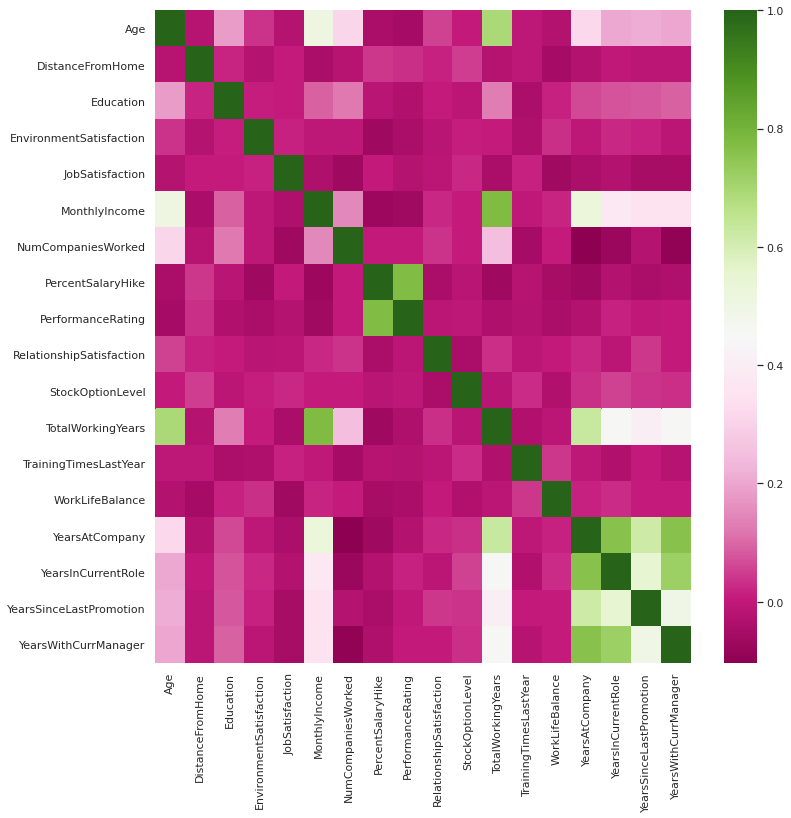

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),cmap="PiYG")

# 3. Xử lý category
- Có nhiều phương pháp như label encoding, onehot encoding, count encoding, target encoding, v.v. Tùy vào dữ liệu mà mỗi phương pháp sẽ có ưu nhược điểm khác nhau. Xem thêm thư viện xử lý categories của sklearn nếu muốn tìm hiểu sâu hơn.
- Để đơn giản hóa, ta dùng onehot encoding trong bài này

Thư viện pandas đã cung cấp sẵn hàm get_dummies để áp dụng One Hot Encoding

In [ ]:
df_train.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
8,32,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,Laboratory Technician,4,Single,3068,0,No,13,3,3,0,8,2,2,7,7,3,6
10,59,Travel_Rarely,Research & Development,3,3,Medical,3,Female,Laboratory Technician,1,Married,2670,4,Yes,20,4,1,3,12,3,2,1,0,0,0
11,30,Travel_Rarely,Research & Development,24,1,Life Sciences,4,Male,Laboratory Technician,3,Divorced,2693,1,No,22,4,2,1,1,2,3,1,0,0,0
12,38,Travel_Frequently,Research & Development,23,3,Life Sciences,4,Male,Manufacturing Director,3,Single,9526,0,No,21,4,2,0,10,2,3,9,7,1,8


In [ ]:
example = pd.get_dummies(df_train.Department)
example.head()

,Human Resources,Research & Development,Sales
EmployeeNumber,,,
1,0,0,1
2,0,1,0
4,0,1,0
5,0,1,0
7,0,1,0


**Lưu ý**

Đối với các cột chỉ có 2 categorical value dạng YES-NO, ta không cần dùng One-Hot Encoding mà chỉ cần chuyển các giá trị trong cột về dạng 0 1

In [ ]:
# TODO
# 1. Convert binary categorical column to 0, 1
# vấn đề khi one hot 
df_train['OverTime'] = df_train['OverTime'].map({'Yes':1,'No':0})
df_train['Gender'] = df_train['Gender'].map({'Male':1,'Female':0})
df_test['OverTime'] = df_test['OverTime'].map({'Yes':1,'No':0})
df_test['Gender'] = df_test['Gender'].map({'Male':1,'Female':0})


In [ ]:
# TODO
# 1. Apply one hot encoding for all categorical columns
# df_train.head()
df_full = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)
df_full.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,2,2,0,4,5993,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,49,8,1,3,1,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,37,2,2,4,1,3,2090,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5,33,3,4,4,0,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,27,2,1,1,1,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# 4. Xây dựng model
- Sử dụng Deep Learning
- Sử dụng thuật toán Decision Tree
- Sử dụng thuật toán Random Forest (ensemble của decision tree)
- So sánh

Đầu tiên ta cần chia dữ liệu thành 2 Set: Train và Test ``(random_state=42, test_size=0.3, stratify)``

In [ ]:
# TODO
# 1. Split data to train and test
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(df_full,y,test_size = 0.3, stratify = y, shuffle = True, random_state = 42)
y_train.value_counts()

0    583
1    117
Name: Attrition, dtype: int64

**Over-sampling (Optional)**

Lưu ý khi chạy cell code này, X_train sẽ bị chuyển về dạng numpy.array thay vì dataframe, do đó 1 số đoạn code bên dưới sẽ không chạy được, cần phải modify lại (khuyến khích chạy thử sau khi nắm vững bài lab này)

In [ ]:
# oversampler=SMOTE(random_state=42, sampling_strategy='all')
# X_train, y_train = oversampler.fit_sample(X_train,y_train)
# sum(y_train == 0), sum(y_train == 1)

In [ ]:
X_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
631,32,11,4,4,1,3,4707,8,0,12,3,4,0,6,2,3,4,2,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1340,40,16,2,3,1,3,3544,9,0,16,3,2,1,6,0,3,4,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
577,35,22,3,4,1,3,4230,0,0,15,3,3,0,6,2,3,5,4,4,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
784,23,10,1,1,1,3,3505,1,0,18,3,4,0,2,3,3,2,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
763,40,2,1,4,0,4,2342,0,1,20,4,4,0,5,2,2,4,2,2,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Khi áp dụng Decision Tree, ta không cần scale data.

Tuy nhiên ở đây ta muốn compare performance giữa Decision Tree và Deep Neural Network nên ta sẽ thực hiện scale data để mô hình DNN chạy tốt hơn

In [ ]:
# TODO
# 1. Apply Standard Scaler on X_train, X_test
# 2. Name the scaled X_train_scaled, X_test_scaled
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Mô hình DNN

In [ ]:
# TODO
# 1. Define and combine DNN model
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

clear_session()
set_seed(42)
np.random.seed(42)



model_mlp = Sequential()


model_mlp.add(Dense(100,activation = 'relu',input_shape = X_train.shape[1:]))
model_mlp.add(Dense(100,activation = 'relu'))
model_mlp.add(Dense(100,activation = 'relu'))
model_mlp.add(Dense(100,activation = 'relu'))
model_mlp.add(Dense(1,activation = 'sigmoid'))
model_mlp.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = 'accuracy')
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 34,901
Trainable params: 34,901
Non-trainable params: 0
_________________________________________________________________


**Thực hiện train DNN**

In [ ]:
# TODO
# 1. Call fit
history_mlp = model_mlp.fit(X_train,y_train,epochs = 200)

Epoch 1/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8329
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8329
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8329
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8329
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.8329
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8329
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8329
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8329
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8329
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8329
Epoch 11/

**Evaluate DNN**

In [ ]:
# TODO
# 1. Call evaluate
model_mlp.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8333


[0.41980817914009094, 0.8333333134651184]

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.title('Loss vs Epochs')
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy vs Epochs')
    plt.show()

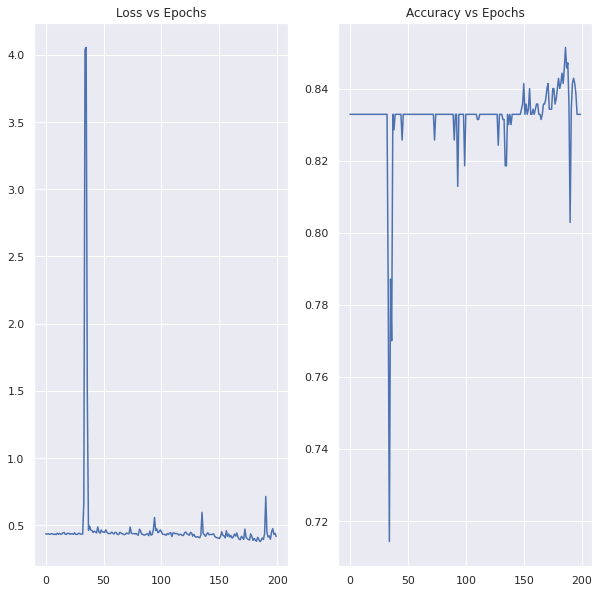

In [ ]:
plot_learning_curve(history_mlp)

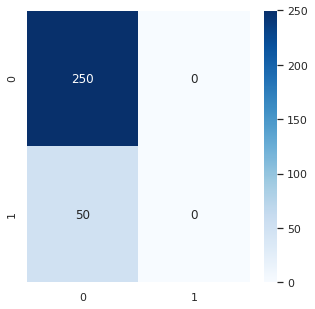

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_mlp = model_mlp.predict(X_test_scaled) > 0.5
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='d')


### Mô hình Decision Tree

**Khởi tạo và huấn luyện**

In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
model_decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4 ,random_state = 42)
model_decisiontree.fit(X_train,y_train)
model_decisiontree.score(X_train,y_train)



0.8771428571428571

**Evaluate**

In [ ]:
print('Decision Tree score: ' + str(model_decisiontree.score(X_test, y_test)))

Decision Tree score: 0.8166666666666667


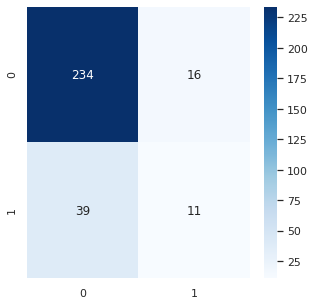

In [ ]:
y_pred_decision = model_decisiontree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_decision)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='d')

### Mô hình RandomForest

**Khởi tạo và huấn luyện**

In [ ]:
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier 

model_randomforest = RandomForestClassifier(criterion = 'entropy', max_depth = 4, random_state = 42)
model_randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Evaluate**

In [ ]:
print('Random forest score: ' + str(model_randomforest.score(X_test, y_test)))

Random forest score: 0.8366666666666667


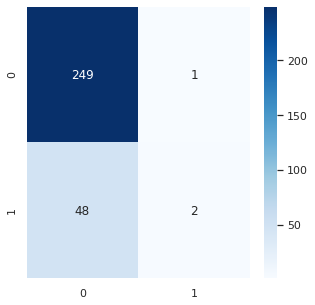

In [ ]:
y_pred_random = model_randomforest.predict(X_test)
cm = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='d')

In [ ]:
# feature importance
def drawFeatureImportance(model, title, n_top):
  plt.figure(figsize=(10,6))
  importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
  importances = importances.sort_values('importance',ascending=False).head(n_top)
  sns.barplot(y=importances['feature'],x=importances['importance']).set_title(title)
  

## Những feature có ảnh hưởng mạnh nhất đến kết quả dự đoán

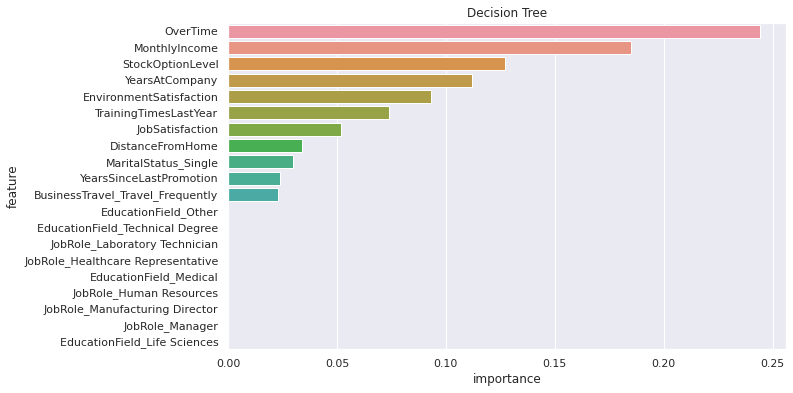

In [ ]:
drawFeatureImportance(model_decisiontree, 'Decision Tree',20)

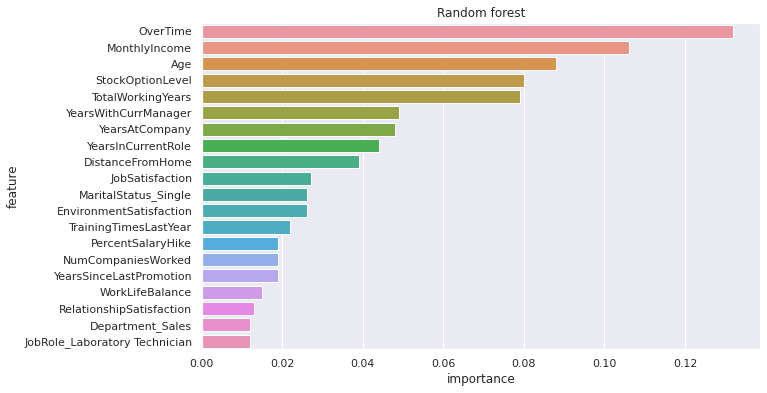

In [ ]:
drawFeatureImportance(model_randomforest, 'Random forest',20)

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# draw tree
def drawTree(model):
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names = X_train.columns,
                  class_names=[str(x) for x in model.classes_]
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return graph.create_png()

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYsJGqOEwiOVOFHnbeIgzmXCwgAKImInIUl9zWVQxUHEYbLM0s9Q&s)
# **Câu hỏi**: Nhìn vào hình vẽ, hãy tìm ra những điều kiện dẫn đến một người phải nghỉ việc /  không muốn nghỉ việc

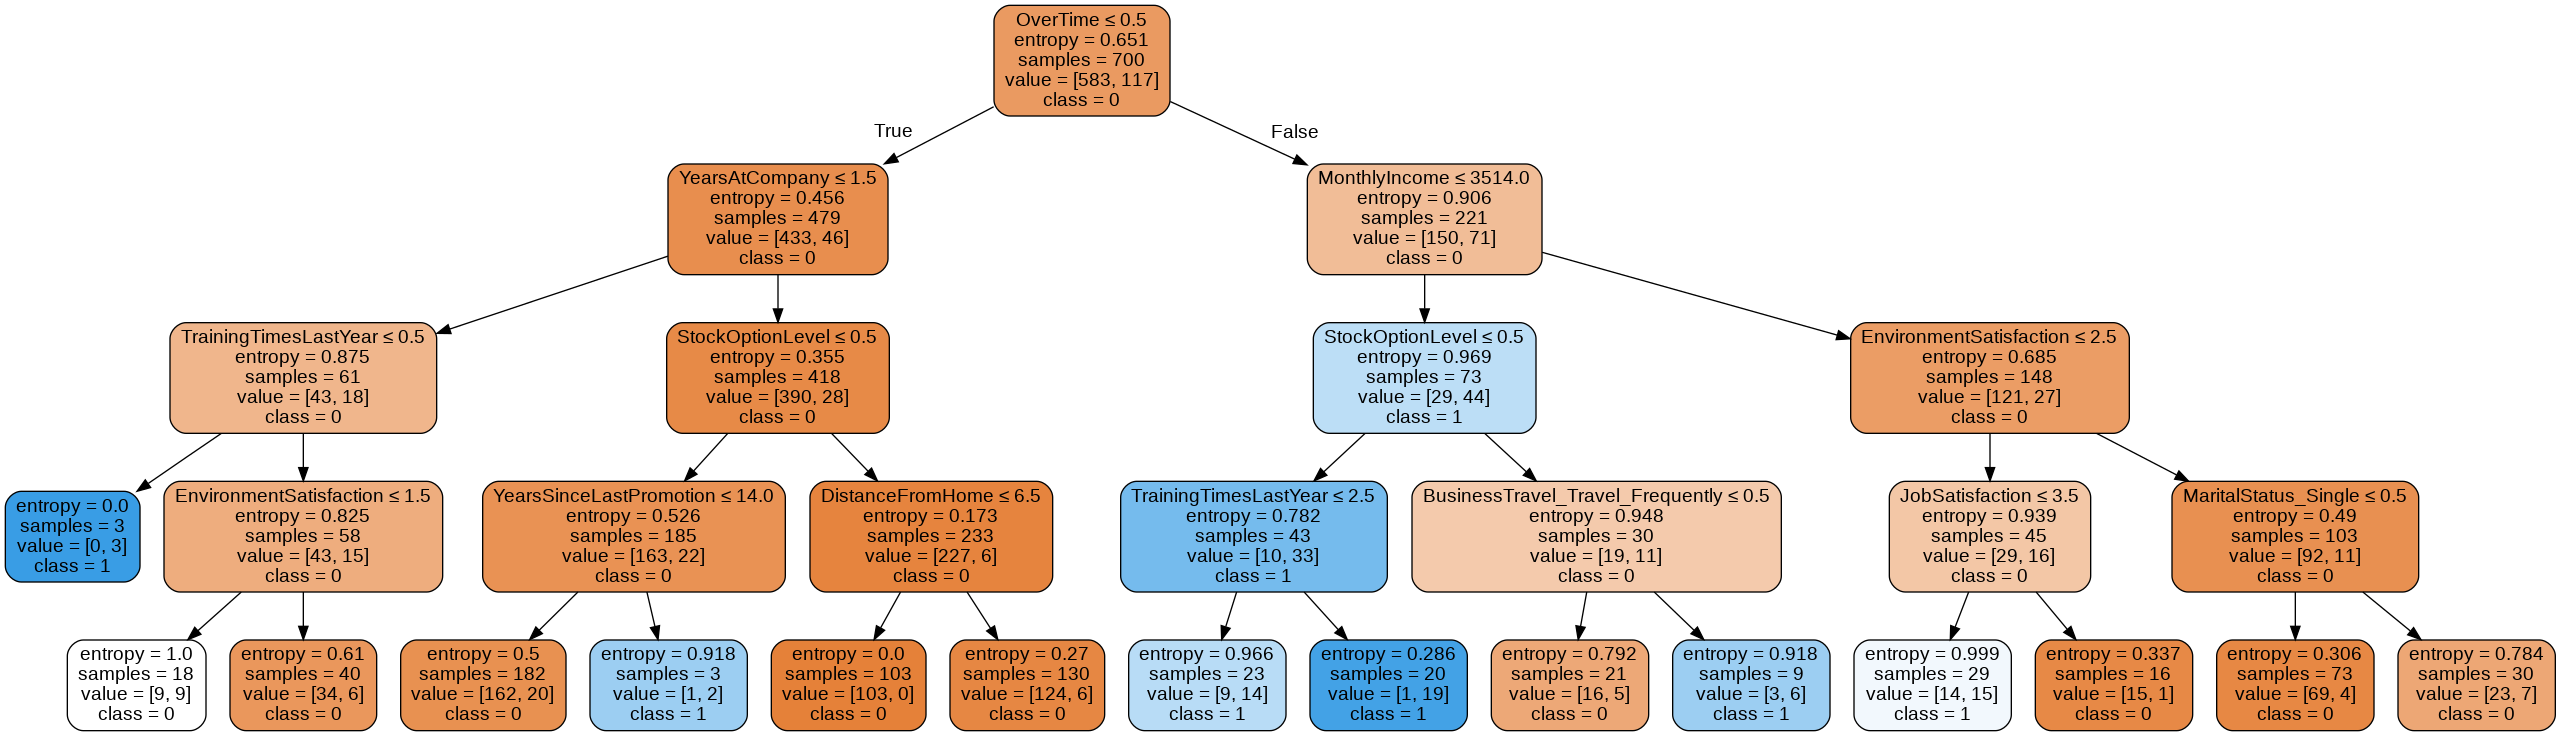

In [ ]:
Image(drawTree(model_decisiontree))

## ROC & AUC
Một số khái niệm:
- True Possitive (TP): Sự kiện xảy ra và ta dự báo có xảy ra
- False Possitive (FP): Sử kiện có xảy ra và ta dự báo không xảy ra
- True Negative (TN): Sự kiện không xảy ra và ta dự báo không xảy ra
- False Negative (FN): Sự kiện không xảy ra và ta dự báo có xảy ra

Vây ta sẽ tính tỉ lệ đoán trúng (true possitive rate) và tỉ lệ đoán trật (false possitive rate) như sau:

$$ TPR = \frac{TP}{TP+FN}$$
$$ FPR = \frac{FP}{FP+TN}$$

No Skill: ROC AUC=0.500
With mlp: ROC AUC=0.731
With decision tree: ROC AUC=0.673
With random forest: ROC AUC=0.750
Best: ROC AUC=1.000


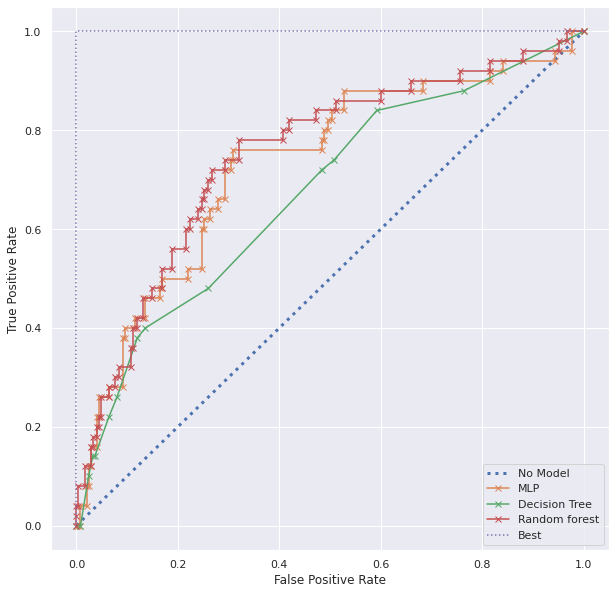

In [ ]:
# ROC & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# pred_proba = model.predict_proba(X_test)
# print('AUC: ' + str(roc_auc_score(y_test, pred_proba[:,1])))

nomodel_probs = [0 for _ in range(len(y_test))]

mlp_probs = model_mlp.predict(X_test_scaled)[:, 0]

decisiontree_probs = model_decisiontree.predict_proba(X_test)[:, 1]

randomforest_probs = model_randomforest.predict_proba(X_test)[:, 1]

best_probs = [x for x in y_test]

nomodel_auc = roc_auc_score(y_test, nomodel_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
decisiontree_auc = roc_auc_score(y_test, decisiontree_probs)
randomforest_auc = roc_auc_score(y_test, randomforest_probs)
best_auc = roc_auc_score(y_test, best_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (nomodel_auc))
print('With mlp: ROC AUC=%.3f' % (mlp_auc))
print('With decision tree: ROC AUC=%.3f' % (decisiontree_auc))
print('With random forest: ROC AUC=%.3f' % (randomforest_auc))
print('Best: ROC AUC=%.3f' % (best_auc))

# calculate roc curves
nomodel_fpr, nomodel_tpr, _ = roc_curve(y_test, nomodel_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_test, decisiontree_probs)
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_test, randomforest_probs)
best_fpr, best_tpr, _ = roc_curve(y_test, best_probs)

plt.figure(figsize=(10,10))
# plot the roc curve for the model
plt.plot(nomodel_fpr, nomodel_tpr, linestyle=':',linewidth=3, label='No Model')
plt.plot(mlp_fpr, mlp_tpr, marker='x', label='MLP')
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='x', label='Decision Tree')
plt.plot(randomforest_fpr, randomforest_tpr, marker='x', label='Random forest')
plt.plot(best_fpr, best_tpr, linestyle=':', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# 5. Dự báo người sẽ nghỉ việc

In [ ]:
predict = model_randomforest.predict(df_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Tạo một Dataframe mới bao gồm EmployeeNumber trong df_test và các giá trị vừa predict (Attrition)


In [ ]:
temp_df = pd.DataFrame({'EmployeeNumber':df_test.index,'Attrition':predict})
temp_df.head()

,EmployeeNumber,Attrition
0,1409,0
1,1411,0
2,1412,0
3,1415,0
4,1417,0


Merge các cột còn lại trong df_test với dataframe vừa tạo

In [ ]:
temp_df = temp_df.merge(df_test,on='EmployeeNumber')
temp_df.head(3)

,EmployeeNumber,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1409,0,52,8,4,3,0,1,2950,9,0,13,3,3,0,12,2,1,5,4,0,4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1411,0,37,11,3,1,0,3,3629,4,0,18,3,1,0,8,6,3,3,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1412,0,35,18,2,3,1,4,9362,2,0,11,3,3,0,10,2,3,2,2,2,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# 6. Thử nghiệm một chính sách về nhân sự

## Danh sách những người dự báo sẽ nghỉ

In [ ]:
sum(temp_df.Attrition == 1)

6

In [ ]:
new_policy = temp_df.copy(True)
new_policy = new_policy.drop(columns=['Attrition'])
new_policy = new_policy.drop(columns=['EmployeeNumber'])


## Thực thi một chính sách về nhân sự

**Tăng lương**

In [ ]:
new_policy['MonthlyIncome'] = new_policy['MonthlyIncome'] * 1.5
result = model_randomforest.predict(new_policy)
sum(result)

3

**Không OT**

In [ ]:
new_policy['OverTime'] = 0
result = model_randomforest.predict(new_policy)
sum(result)


1

## **Kết quả: Nếu bỏ chính sách overtime trong doanh nghiệp thì những người này sẽ ở lại doanh nghiệp**